# _Dataviz Code Session_: Quantidades

## Objetivos da DCS

- Aplicar técnicas de dataviz para plotagem e manipulação de representações visuais de quantidades.
- Elaborar RV para dados acerca de consumidores da Netflix (Fonte: [kaggle](https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset)).

## Ferramentas utilizadas

- Módulos Python
    - `pandas`
    - `numpy`
    - `matplotlib`
    - `seaborn`

## Aplicação do modelo referencial

- Vide {numref}`Capítulo %s <cap:estetica>`.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

plt.style.use('../etc/gcpeixoto-datavis.mplstyle') # style sheet

### Dados de entrada pré-processados

- Carregamento de dados

In [2]:
df = pd.read_csv('../data/netflix-data.csv')
df = df.set_index('User ID')
df

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
User ID,,,,,,,,,
1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...
2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month


## Visualização de quantidades com histogramas

### Plotagem com `pandas`

- O módulo `pandas` possui métodos para plotagem básica que provêm do `matplotlib` e são um _wrapper_ de `plt.plot()`.
- Esses métodos são diretamente aplicáveis a `Series` e `DataFrames`.

- Histogramas para objetos `DataFrame`
    - Visualizar distribuições para todas as variáveis possíveis.

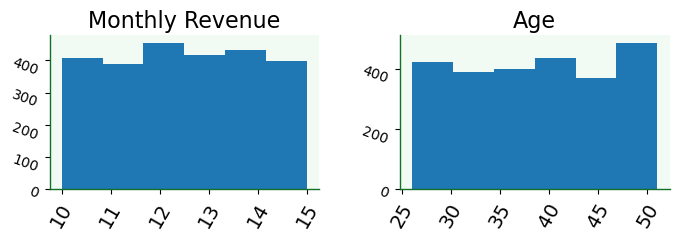

In [3]:
df.hist(figsize=(8,2),
        bins=6,
        grid=False,
        xlabelsize=14,
        ylabelsize=10,
        xrot=60,
        yrot=-20);

- Histogramas para objetos `Series`

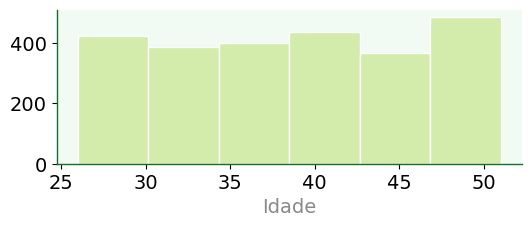

In [4]:
fig, ax = plt.subplots()

df['Age'].hist(figsize=(6,2),
               bins=6, 
               grid=False,
               color='#d3ecab',
               edgecolor= 'w',
               xlabelsize=14,
               ylabelsize=14)

ax.set_xlabel('Idade');

- Histograma gerado por meio de `plot`

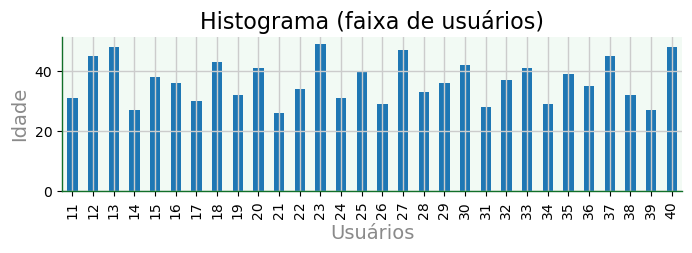

In [5]:
df.iloc[10:40]['Age'].plot(kind='bar',
                           title='Histograma (faixa de usuários)',
                           figsize=(8,2),
                           xlabel='Usuários',
                           ylabel='Idade');

### Plotagem com `matplotlib`

- Histogramas gerados com `hist` e suas opções.

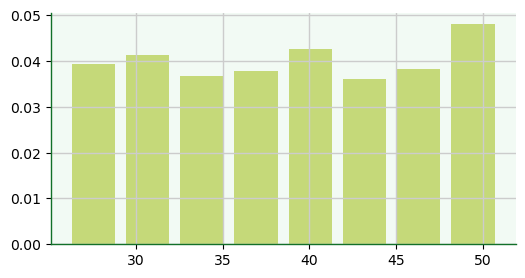

In [6]:
fig, ax = plt.subplots(figsize=(6,3))
ax.hist(x=df['Age'],
        density=True,
        histtype='bar',
        align='mid',
        rwidth=0.8,
        color='#99ba00',
        bins=8,
        alpha=0.5);


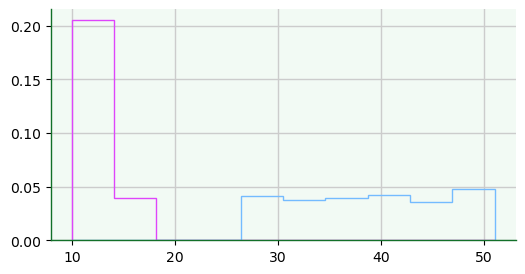

In [7]:
fig, ax = plt.subplots(figsize=(6,3))
ax.hist(x=df[['Age','Monthly Revenue']],
        density=True,
        histtype='step',
        align='mid',
        rwidth=0.3,
        linewidth=1,
        color=['#74bbff','#de45fb'],
        bins=10);

### Plotagem com `seaborn`

- Opções de plotagem com `histplot`
    - Plotar diversidade de casos com alteração das variáveis

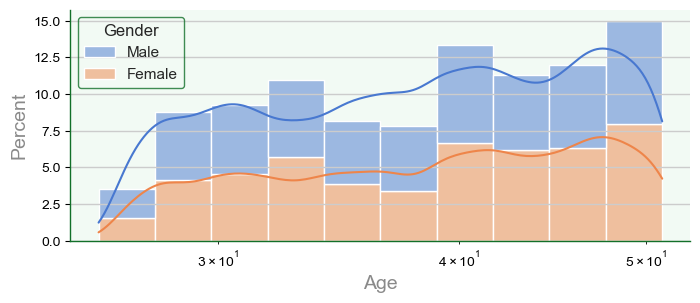

In [8]:
f, a = plt.subplots(figsize=(8,3))
sb.set_theme(style='darkgrid')

hp = sb.histplot(data=df,
            x='Age', # 'y' para barra horizontal
            hue='Gender',
            bins=10,
            #binwidth=1, # opção com bins
            #binrange=(32,40), # extensão
            cumulative=False, # cumulativa
            stat='percent', # 'count' | 'frequency' | 'probability' | 'density'
            multiple='stack',
            palette='muted',
            kde=True, # density 
            kde_kws={'bw_method':'silverman', # método de binning: 'scott' | 'silverman'
                     'bw_adjust':0.5},  # ajuste da largura de banda: quanto maior, mais suave
            element='bars', # 'bars' | 'step' | 'poly'
            linewidth=1,
            edgecolor='w',
            log_scale=True,
            ax=a)

## Visualização de quantidades com mapa de calor

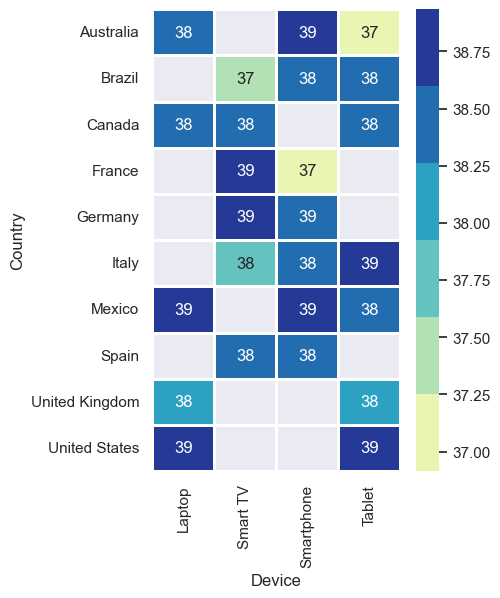

In [9]:
f, a = plt.subplots(figsize=(4,6))
dfpt = pd.pivot_table(df, index='Country', columns='Device', values='Age')

# escolha 'mask' para exibir mapa de calor com máscara
test = 'mask'

if test == 'full':
    mask = ~np.ones(dfpt.shape,dtype=bool)   
else:
    mask = ~np.ones(dfpt.shape,dtype=bool)
    indices = np.argwhere(dfpt.values > 39)    
    mask[indices[:,0], indices[:,1]] = True

g = sb.heatmap(data=dfpt,
               cmap=sb.color_palette('YlGnBu'),
               annot=True,
               linewidths=1,
               linecolor='white',
               square=False,
               cbar=True,
               xticklabels=True,
               yticklabels=True,
               mask=mask,
               ax=a)
